# E-F5- Programmation dynamique - CORRECTION

La programmation dynamique est une **méthode d'optimisation**. Elle permet de résoudre des problèmes qui peuvent se décomposer récursivement en sous-problèmes - comme le permet l'approche "*diviser pour régner*". Mais, lorsque les sous-problèmes ne sont pas indépendants (on dit qu'ils se chevauchent) et que leur résolution peut conduire à des calculs redondants sur les mêmes sous-problèmes, la programmation dynamique optimise la résolution en stockant les valeurs déjà calculées.

Cette approche utilise un peu plus de mémoire, comme par exemple un tableau, pour stocker des valeurs calculées, mais elle permet de gagner du temps d'exécution, en évitant de refaire les mêmes calculs plusieurs fois.

# AFVM1 : la suite de Fibonacci

Fibonacci a publié en 1202 un recueil de problèmes pratiques, le *Liber abaci*. Le but était d'exposer les applications pour le commerce de l'utilisation des chiffres arabes et des algorithmes arithmétiques permettant de calculer avec ces chiffres arabes. Ce livre a conduit à l'utilisation des chiffres arabes en Occident plutôt que des chiffres romains.
Le problème le plus célèbre du *Liber abaci* est le suivant : Combien de couples de lapins aurons-nous à la fin de l'année si nous commençons avec un couple qui engendre chaque mois un autre couple qui procréé à son tour au bout de deux mois ? Cet énoncé sous-entend les conditions suivantes :
1. La maturité sexuelle du lapin est atteinte après un mois qui est aussi la durée de gestation.
2. Chaque portée comporte toujours un mâle et une femelle.
3. Les lapins ne meurent pas !!


Si on note $fibo(n)$ le nombre de couples de lapins au bout de  $n$ mois, on peut modéliser le problème "pratique" par une suite $fibo$ définie par la relation de récurrence suivante :
$$\left\{
	\begin{array}{ll}
		fibo(0) = 0 \\
		fibo(1) = 1 \\
		fibo(n) = fibo(n-1) + fibo(n-2) \text{ pour } n>1
	\end{array}
\right.$$


0. Calculer $fibo(3)$ et interpréter ce résultat.


$fibo(3) = fibo(2) + fibo(1) = fibo(2) + 1 = 1+1 = 2$ car $fibo(2) = fibo(1) + fibo(0) = 1+0 = 1 $

Il y a 2 couples de lapins au bout de 3 mois.

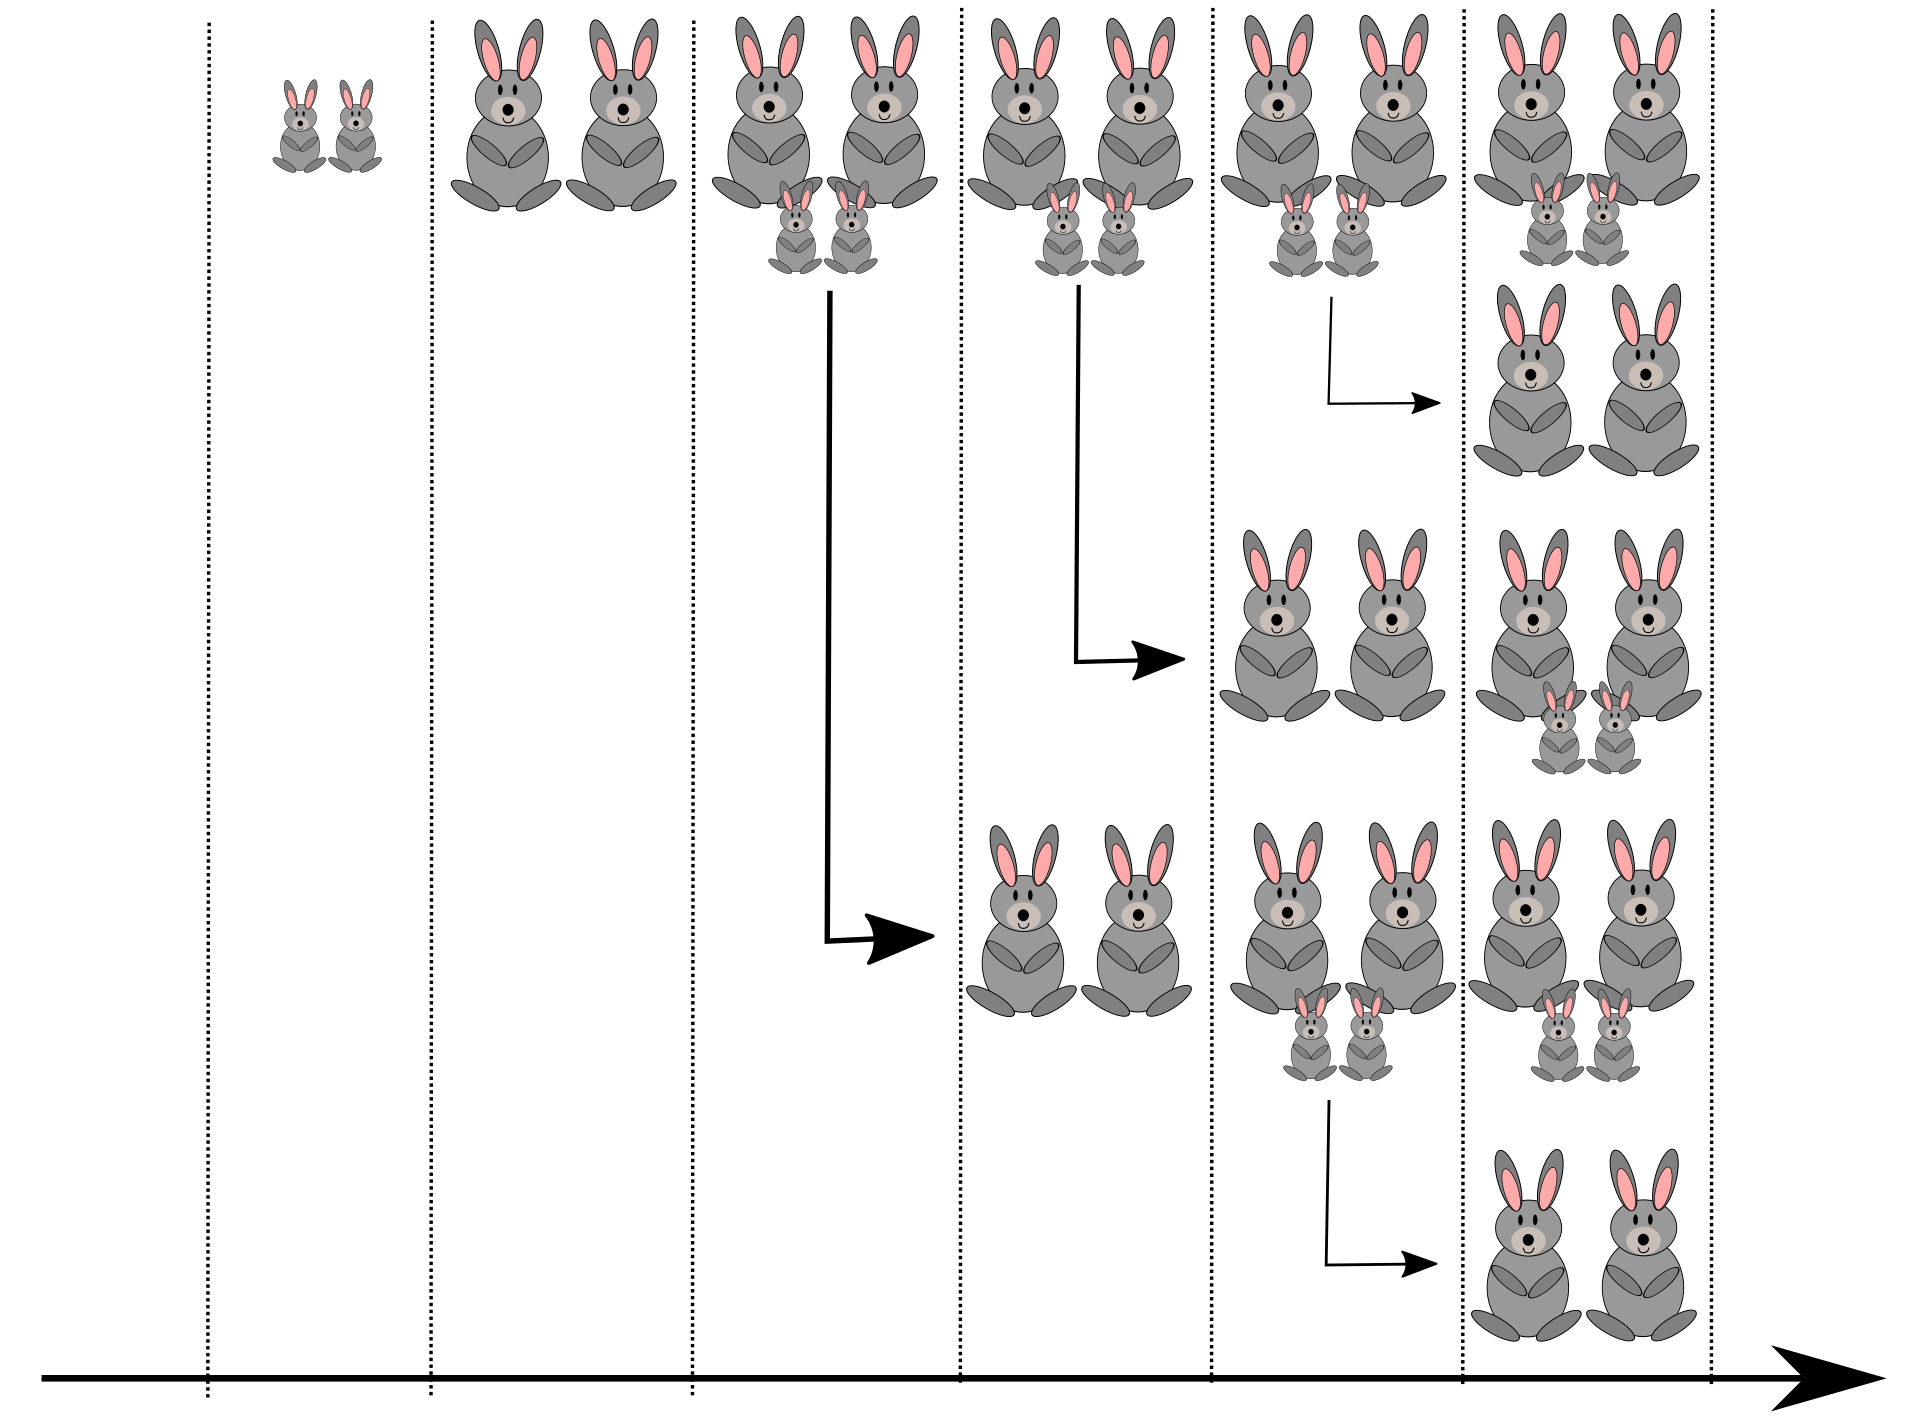

1. Écrire une fonction récursive `fibo_r` qui prend comme argument un entier naturel `n` et qui renvoie le nombre $fibo(n)$ de couples de lapins au bout de  $n$ mois.

In [1]:
def fibo_r(n):
    if n== 0 or n==1 : 
        return n
    else : 
        return fibo_r(n-1)+fibo_r(n-2)
print(fibo_r(3))

2


2. Testez votre fonction récursive en exécutant `fibo_r(35)`. Que remarquez-vous ?

In [ ]:
print(fibo_r(35))

3. a) Calculez le nombre d'appels effectués pour obtenir `fibo_r(4)`.

Voir  l'arbre d'appels ci dessous : `fibo_r(4)` fait 9 appels.

   b) Faire de même avec `fibo_r(5)`. Calculer le coefficient multiplicateur pour passer du nombre d'appel pour `fibo_r(4)` à celui pour `fibo_r(5)`.
   
   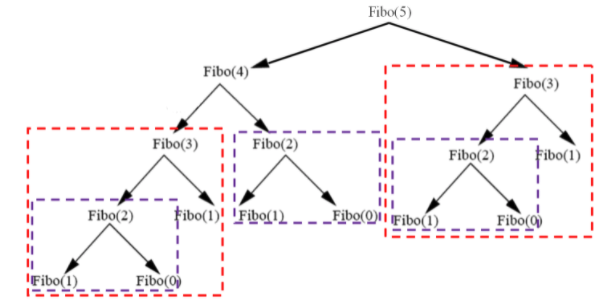
   
   `fibo_r(5)` fait 15 appels.

   c) En admettant que le coefficient multiplicateur obtenu à la question précédente reste en gros vrai quant au coût pour passer de `fibo_r(n)` à `fibo_r(n+1)`, déduire comment se comporte la compléxité en temps de cet algorithme.
   
   $C(n+1) = \dfrac{15}{9} C(n)$, on reconnait l'expression d'une suite géométrique donc le cout en temps de cet algorithme est exponentiel.

4. Il est  possible d'utiliser la programmation dynamique pour éviter ces calculs redondants. Écrire une fonction récursive `fibo_dyn` qui prend comme argument un entier naturel `n` et qui renvoie le nombre $fibo(n)$ de couples de lapins au bout de  $n$ mois, en utilisant la programmtion dynamique.

In [5]:
def fibo_dyn(n):
    T = [0]*(n+1)
    T[0] = 0 # inutile
    T[1] = 1
    for i in range(2,n+1):
        T[i] = T[i-1] + T[i-2]
    return T[n]
print(fibo_dyn(35))

9227465


5. On admet que la complexité en temps de la fonction récursive `fibo_r` est exponentielle (réponse de la question 3).

Déterminer la complexité en temps de la fonction itérative `fibo_dyn`.

La complexité en temps de la fonction itérative est linéaire du fait de la boucle `for`

# AFVM3 : 
*d'après http://www.monlyceenumerique.fr/nsi_terminale/a/a4_prog_dynamique.php*

Un magasin vend des pralines par paquets de 6, 9 ou 20.
Un nombre entier $n$ sera appelé dans cet exercice nombre à pralines si, et seulement si, ce nombre 
$n$ peut s'écrire comme une somme de 6, de 9 et de 20.

Pour simplifier la suite, on supposera que 0 est un nombre à pralines (en achetant aucun paquet de pralines, on peut obtenir ce nombre)
Par exemple, $21 = 6+6+9$ donc 21 est un nombre à pralines, par contre 11 n'est pas un nombre à pralines.
Posons $Pral(n)$ un booléen qui faut *true* si, et seulement si, $n$ est un nombre à pralines.

1. Que vaut $Pral(n)$ lorsque $n$ est négatif ? Lorsque $n = 0$ ?

2. Proposer une formule de récurrence sur $Pral(n)$.

Aide : hormis les deux cas précédents directs, utiliser les opérateurs *or* ou *and* sur les booléens pour exprimer 
$Pral(n)$ en fonction de valeurs précédentes.

3. En déduire une fonction récursive `est_pral_rec` qui prend en paramètre un nombre entier et renvoie un booléen correspondant à $Pral(n)$.

4. Dessinez un graphe simplifié des dépendances sur un tableau donnant les premières valeurs de n.

5. a) En déduire une fonction itérative `est_pral` qui prend en paramètre un nombre entier positif et renvoie un booléen correspondant à $Pral(n)$.

   b) Quel est la complexité de cette fonction ? (constante, linéaire, quadratique, exponentielle, ...)

   c) En déduire un algorithme qui reconstruit une solution (nombre d'occurences de 6, de 9 et de 20) dans le cas où $Pral(n) = true$.

1. $Pral(n) = false$ si $n<0$ et $Pral(0) = true$ d'après la convention de l'exercice.
2. $Pral(n)  = Pral(n-6) \text{ or } Pral(n-9) \text{ or } Pral(n-20)$ pour l'entier $n>0$

In [6]:
def est_pral_rec(n):
    if n<0:
        return False
    if n == 0:
        return True
    else : 
        return est_pral_rec(n-6) or est_pral_rec(n-9) or est_pral_rec(n-20)

assert est_pral_rec(11) == False
assert est_pral_rec(21) == True

In [9]:
def est_pral_dyn(n):
    assert n>=0
    L = [False]*19 + [True] + [0]*n            
    for i in range(1, n+1):
        j = i+19
        L[j] = L[j-6] or L[j-9] or L[j-20]
    return L[-1]

assert est_pral_dyn(0)== True
assert est_pral_dyn(11)== False  
assert est_pral_dyn(21)== True

# AFVM2 et 3 : faire fonction pour exemple introductif (Ford Bellman)  : non car on n'a pas vraiment vu l'algo... et alignement de séquence (à faire)

# AFVM3 : p231 manuel turtle pour explication et correction p 480
Ecrire une fonction `chemin(m,n)` d'arguments deux nombres entiers, qui calcule le nombre de chemins, sur une grille `n` $\times$ `m`, qui mènent du coin supérieur gauche au coin inférieur droit, en se déplaçant uniquement le long des traits horizontaux vers la droite et verticaux vers le bas. On utilisera la programmation dynamique. 